# Epileptic Seizure Recognition
In this notebook we will be working on the [Epileptic Seizure Recognition Data Set](https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition). The data set contains pre-processed EEG data of 500 individuals. The data set is divided into 5 classes, each representing a different state of the brain. The classes are as follows:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

This Dataset collect from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html)

## Objective
The objective of this notebook is to build a model that can predict the state of the brain based on the EEG data. To achieve this, we will follow the steps below:
1. Load the data
2. Explore the data
3. Preprocess the data
4. Build and train the model
5. Evaluate the model
6. Conclusion


### 1. Load the data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [9]:
## Load the data
data = pd.read_csv('../data/Epileptic Seizure Recognition.csv')
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


### 2. Explore data

In [10]:
display(data.describe())

# count the number of unique values in the 'unnamed' column
print(f'Number of unique patients {data['Unnamed'].nunique()}')

# split 'Unnamed' by '.' and store in new columns
data[['Chunks', 'Trial', 'Patient']] = data['Unnamed'].str.split('.', expand=True)
# remove X from 'Chunks' and convert to int so we can sort it
data['Chunks'] = data['Chunks'].str.replace('X', '').astype(int)

display(data.head())
print(f'Number of unique chunks {data['Chunks'].nunique()}')
print(f'Number of unique trial {data['Trial'].nunique()}')
print(f'Number of unique patient {data['Patient'].nunique()}')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


Number of unique patients 11500


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X173,X174,X175,X176,X177,X178,y,Chunks,Trial,Patient
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-77,-103,-127,-116,-83,-51,4,21,V1,791
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,152,157,156,154,143,129,1,15,V1,924
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,19,-12,-30,-35,-35,-36,5,8,V1,1
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-77,-85,-77,-72,-69,-65,5,16,V1,60
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,-32,-41,-65,-83,-89,-73,5,20,V1,54


Number of unique chunks 23
Number of unique trial 5
Number of unique patient 495


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X173,X174,X175,X176,X177,X178,y,Chunks,Trial,Patient
0,X1.V1.1,-56,-50,-64,-91,-135,-140,-134,-114,-115,...,-99,-111,-88,-84,-91,-96,5,1,V1,1
1,X2.V1.1,-91,-78,-75,-70,-77,-69,-66,-52,-69,...,-14,-11,-7,-17,-27,-42,5,2,V1,1
2,X3.V1.1,-61,-59,-46,-31,-29,-36,-58,-80,-104,...,-93,-110,-122,-120,-111,-118,5,3,V1,1
3,X4.V1.1,-125,-123,-106,-82,-38,-14,6,4,6,...,-129,-162,-173,-155,-125,-93,5,4,V1,1
4,X5.V1.1,-60,-42,-25,-12,10,16,12,-3,-23,...,-73,-70,-48,-32,-20,-4,5,5,V1,1
5,X6.V1.1,-12,-39,-72,-86,-105,-108,-119,-109,-89,...,-80,-83,-91,-95,-86,-100,5,6,V1,1
6,X7.V1.1,-113,-129,-115,-99,-79,-72,-92,-112,-112,...,-29,-31,-29,-19,-12,-17,5,7,V1,1
7,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,19,-12,-30,-35,-35,-36,5,8,V1,1
8,X9.V1.1,-39,-51,-57,-60,-69,-80,-83,-81,-78,...,-88,-77,-70,-48,-24,-10,5,9,V1,1
9,X10.V1.1,-19,-34,-62,-77,-85,-83,-87,-90,-98,...,-97,-101,-117,-120,-109,-90,5,10,V1,1


[-56 -50 -64 ... -159 -172 -180]


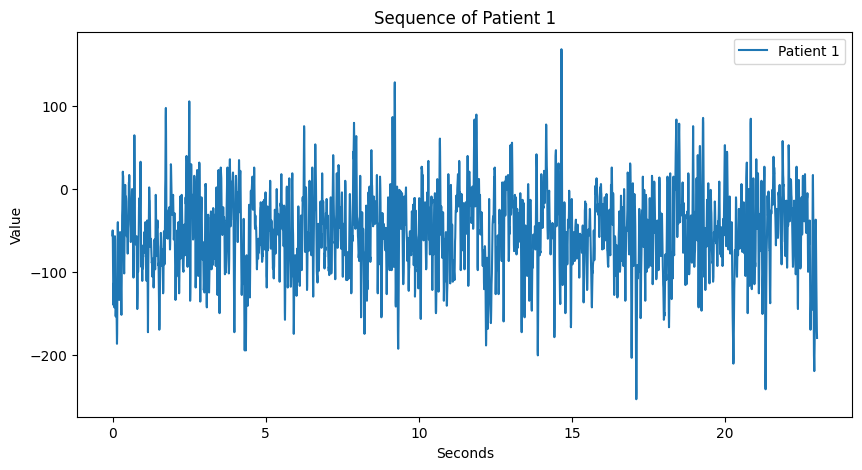

In [15]:
# print on sequence of patient 1
patient_1 = data[data['Patient'] == '1']
# user only trial V1
patient_1_trial_V1 = patient_1[patient_1['Trial'] == 'V1']
# order by chunks
patient_1_trial_V1 = patient_1_trial_V1.sort_values(by='Chunks')
# reset index
patient_1_trial_V1 = patient_1_trial_V1.reset_index(drop=True)
display(patient_1_trial_V1)

# get values from 1 : -4
values = patient_1_trial_V1.values[:, 1:-4] 
# flatten the values
values = values.flatten()
print(values)
# create timesteps, 23 steps are 1 second 
timesteps = np.linspace(0, 23, len(values))

# plot the sequence of patient 1
plt.figure(figsize=(10, 5))
plt.plot(timesteps, values, label='Patient 1')

plt.xlabel('Seconds')
plt.ylabel('Value')
plt.title('Sequence of Patient 1')  
plt.legend()
plt.show()


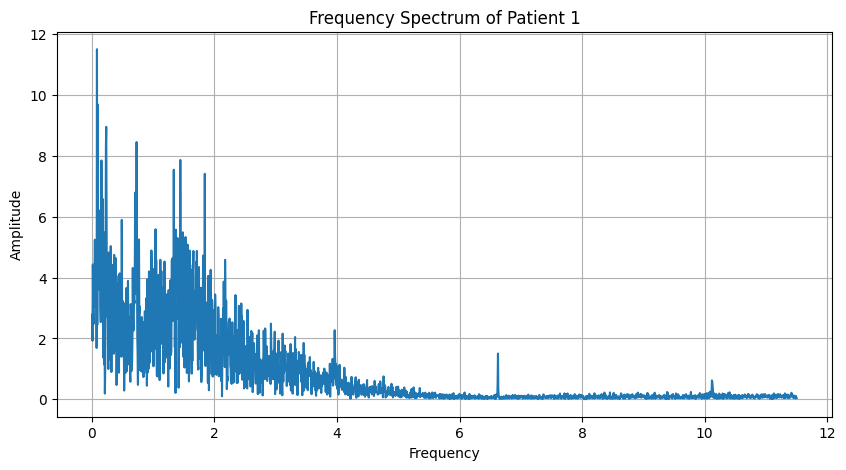

In [21]:
## Plot frequency spectrum of patient 1
from scipy.fftpack import fft

# number of sample points
N = len(values)
# sample spacing
T = 1.0 / 23.0
x = np.linspace(0.0, N*T, N)
yf = fft(values)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = 2.0/N * np.abs(yf[0:N//2])

# remove the first value
xf = xf[1:]
yf = yf[1:]


plt.figure(figsize=(10, 5))
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Patient 1')
plt.show()




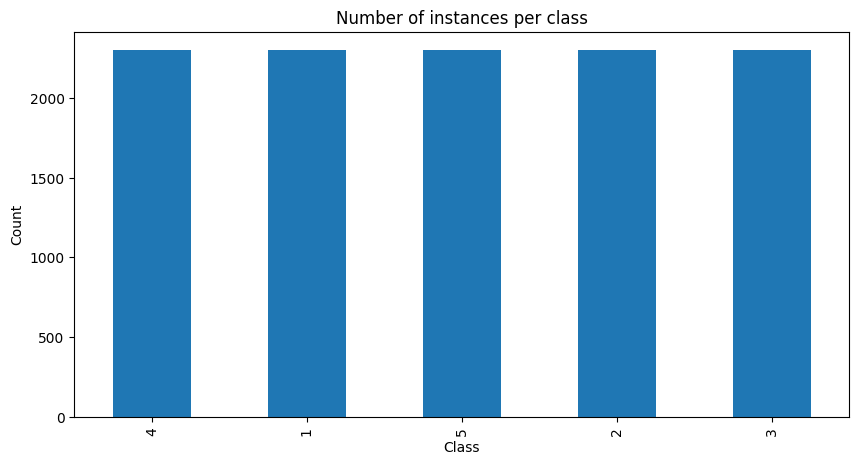

In [24]:
## Create a bar chart of the different classes
plt.figure(figsize=(10, 5))
data['y'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of instances per class')
plt.show()

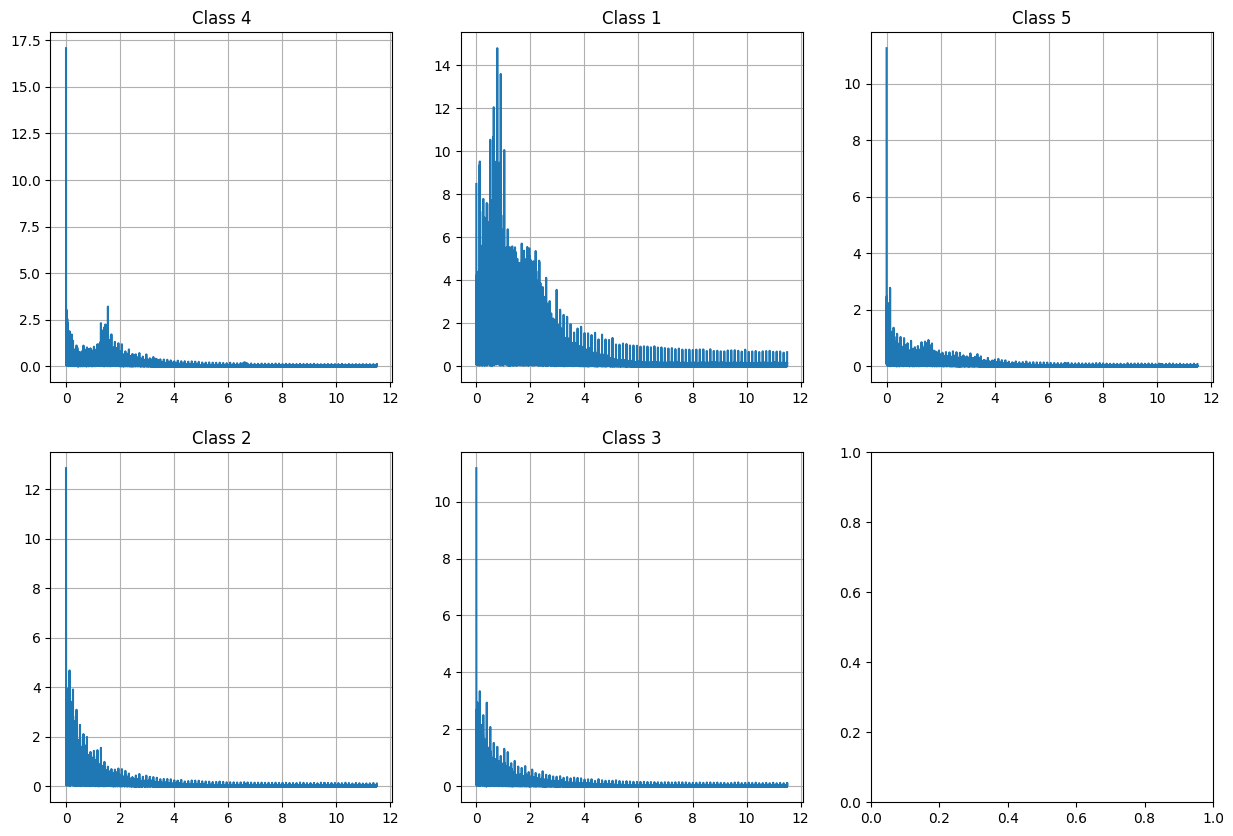

In [26]:
## plot frequency spectrum of all classes
# get the unique classes
classes = data['y'].unique()
# create a subplot with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# flatten the axs
axs = axs.flatten()
# iterate over the classes
for i, c in enumerate(classes):
    # get the values of the class
    values = data[data['y'] == c].values[:, 1:-4]
    # first order by patient and trial
    values = values[np.lexsort((values[:, 0], values[:, 1]))]
    values = values.flatten()
    # number of sample points
    N = len(values)
    # sample spacing
    T = 1.0 / 23.0
    x = np.linspace(0.0, N*T, N)
    yf = fft(values)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    yf = 2.0/N * np.abs(yf[0:N//2])
    # remove the first value
    xf = xf[1:]
    yf = yf[1:]
    axs[i].plot(xf, yf)
    axs[i].grid()
    axs[i].set_title(f'Class {c}')

plt.show()

We can see that the frequency spectrum of the EEG data is different for each class. This is a good sign that we can build a model that can predict the state of the brain based on the EEG data.

### 3. Preprocess the data

In [27]:
data = data.drop(columns=['Unnamed', 'Chunks', 'Trial', 'Patient']).values
x, y = data[:, :-1], data[:, -1]
print(x.shape, y.shape)

(11500, 178) (11500,)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)

(9200, 178) (9200,)


In [32]:
# compute some statistics, features

def compute_statistics(x):
    mean = np.mean(x)
    median = np.median(x)
    std = np.std(x)
    max_ = np.max(x)
    min_ = np.min(x)
    var = np.var(x)
    xf = np.fft.fft(x)
    yf = np.abs(xf)
    yf = yf[:len(yf)//2][1:]
    # get the max frequency
    max_freq = np.argmax(yf)
    # get the mean frequency
    mean_freq = np.mean(yf)
    # get the median frequency
    median_freq = np.median(yf)
    # get the std frequency
    std_freq = np.std(yf)
    
    return mean, median, std, max_, min_, var, max_freq, mean_freq, median_freq, std_freq
    
train_x_features = []
for i in range(x_train.shape[0]):
    features = compute_statistics(x_train[i])
    train_x_features.append(features)
    
train_x_features = np.array(train_x_features)
print(train_x_features.shape)

test_x_features = []
for i in range(x_test.shape[0]):
    features = compute_statistics(x_test[i])
    test_x_features.append(features)
    
test_x_features = np.array(test_x_features)
print(test_x_features.shape)

# scale the features
scaler = StandardScaler()
train_x_features = scaler.fit_transform(train_x_features)
test_x_features = scaler.transform(test_x_features)

(9200, 10)
(2300, 10)


### 4. Build and train the model

In [33]:
# train a simple mlp model with the features and predict the classes

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
mlp.fit(train_x_features, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

### 5. Evaluate the model

In [35]:
report = classification_report(y_test, mlp.predict(test_x_features))
print(report)

              precision    recall  f1-score   support

           1       0.97      0.96      0.96       465
           2       0.60      0.57      0.58       459
           3       0.60      0.56      0.58       450
           4       0.78      0.78      0.78       457
           5       0.70      0.80      0.75       469

    accuracy                           0.73      2300
   macro avg       0.73      0.73      0.73      2300
weighted avg       0.73      0.73      0.73      2300



### 6. Conclusion
Our basic MLP model achieved an accuracy of 73% on the test data. This shows that the model is able to predict the state of the brain based on the EEG data with a good accuracy. We can further improve the model by tuning the hyperparameters or using more advanced models like CNNs or LSTMs.
